# Descriptores de formas

## Contornos

El primer paso para calcular descriptores de formas es obtener una imagen binaria con los objetos de interés segmentados en color blanco sobre fondo negro. Para realizar este paso podemos emplear cualquier algoritmo de segmentación (umbralización, crecimiento de regiones, watershed, split and merge...)

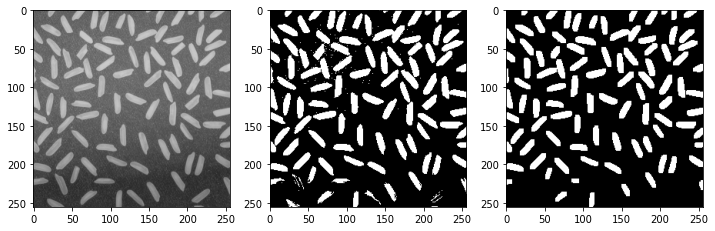

In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,9]


im = cv2.imread("res/rice.png") # Necesitaremos la imagen en color más tarde

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
er = cv2.morphologyEx(thr, cv2.MORPH_OPEN, np.ones((5,5))) # Eliminar ruido de la segmentación

f, ax = plt.subplots(1,3)
ax[0].imshow(im, cmap='gray')
ax[1].imshow(thr, cmap='gray')
ax[2].imshow(er, cmap='gray')
plt.show()

Una vez que obtenemos la segmentación de la imagen, el siguiente paso es obtener los contornos de cada una de los objetos detectados. En OpenCV la función `findContours` realiza esta operación. Esta función recibe los siguientes parámetros:
- Imagen de entrada binaria de tipo np.uint8
- Modo de recuperación de contornos: `cv2.RETR_EXTERNAL` implica que sólo se recuperan los contornos externos. `cv2.RETR_TREE` devuelve todos los contornos anidados.
- Método de aproximación de contornos: `cv2.CHAIN_APPROX_SIMPLE` realiza una aproximación sencilla incluyendo sólo los extremos de cada segmento detectado.

La función `findContours` devuelve dos parámetros: la lista de contornos y la jerarquía que existe entre los contornos (si la opción de recuperación de contornos especificada devuelve la jerarquía de contornos). 

La función `drawContours` permite dibujar los contornos detectados. Esta función recibe los siguientes parámetros:
- La imagen de entrada en 3 canales
- Los contornos detectados
- Qué contorno se va a dibujar (-1 significa todos los contornos)
- Color en el que se dibujarán los contornos
- Grosor de línea con la que se dibujarán los contornos

Nota: la función `drawContours` modifica la imagen que se pasa como parámetro.

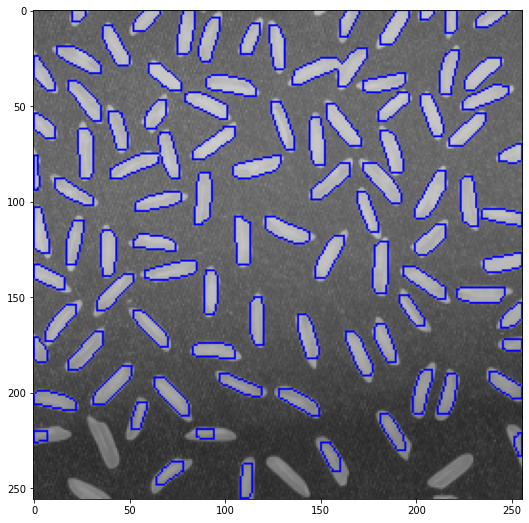

In [3]:
contours, hierarchy = cv2.findContours(er,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

out = im * 1 # Copiamos la imagen original para no modificarla
cv2.drawContours(out, contours, -1, (0,0,255), 1)

plt.imshow(out, cmap='gray')
plt.show()


## Descriptores simples

OpenCV implementa varias funciones para calcular distintos tipos de descriptores simples de formas como el área y el perímetro de cada contorno. A partir de estas variables es posible derivar otros descriptores como la circularidad. 

También implementa funciones para detectar el rectángulo en el que se inscribe la forma, tanto rotado como el no rotado. A partir del ancho y del alto de los rectángulos podemos calcular la excentricidad, la elongación o la rectangularidad del contorno.

Contorno 0
Area 98.0
Perimetro 45.65685415267944
Contorno 1
Area 98.0
Perimetro 43.79898917675018
Contorno 2
Area 94.5
Perimetro 43.55634891986847
Contorno 3
Area 37.5
Perimetro 30.242640614509583
Contorno 4
Area 37.5
Perimetro 25.41421353816986
Contorno 5
Area 43.5
Perimetro 27.41421353816986
Contorno 6
Area 129.0
Perimetro 53.455843567848206
Contorno 7
Area 78.5
Perimetro 39.899494767189026
Contorno 8
Area 155.5
Perimetro 57.55634891986847
Contorno 9
Area 150.5
Perimetro 58.870057225227356
Contorno 10
Area 174.5
Perimetro 60.183764576911926
Contorno 11
Area 138.0
Perimetro 56.14213538169861
Contorno 12
Area 135.0
Perimetro 58.62741661071777
Contorno 13
Area 136.5
Perimetro 52.041630148887634
Contorno 14
Area 150.5
Perimetro 59.55634891986847
Contorno 15
Area 187.5
Perimetro 63.01219439506531
Contorno 16
Area 149.5
Perimetro 55.899494767189026
Contorno 17
Area 57.5
Perimetro 30.242640614509583
Contorno 18
Area 71.0
Perimetro 35.3137081861496
Contorno 19
Area 169.0
Perimetro 62.2842707

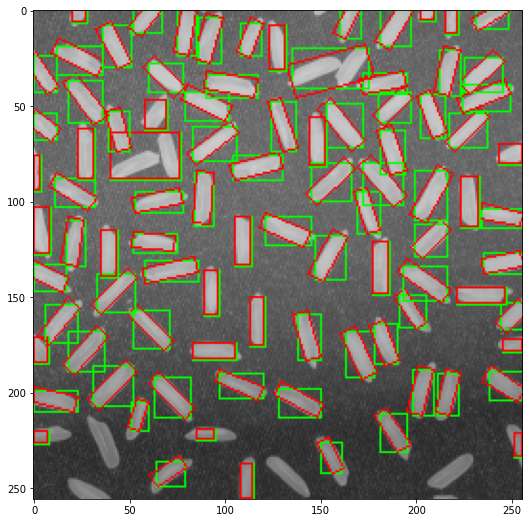

In [4]:
out = im * 1
for idx, cnt in enumerate(contours):
    # Rectángulo (no rotado) en el que se inscribe el contorno
    # x,y representan la esquina superior izquierda 
    # w,h es el ancho y alto del rectángulo
    x,y,w,h = cv2.boundingRect(cnt) 
    cv2.rectangle(out, (x,y), (x+w,y+h), (0,255,0),1) # Lo dibujamos en verde
    
    # Rectángulo rotado en el que se inscribe el contorno
    # Esta función devuelve además el ángulo de rotación del rectángulo
    ((x,y),(w,h), angle) = cv2.minAreaRect(cnt) 
    # Es necesario calcular los cuatro esquinas del rectángulo a partir de 
    # las variables que devuelve la función minAreaRect
    box = cv2.boxPoints(((x,y),(w,h), angle))
    box = np.int0(box) # Convertir flotantes a enteros (las posiciones en la imagen son enteros!)
    cv2.drawContours(out, [box], 0, (255,0,0),1)
    
    print("Contorno", idx)
    print("Area", cv2.contourArea(cnt)) # Area
    print("Perimetro", cv2.arcLength(cnt, True)) # Perímetro
    
plt.imshow(out, cmap='gray')
plt.show()

### Ejercicio
Modifica el código anterior para incluir las medidas de circularidad, excentricidad y rectangularidad de cada uno de los contornos.

Contorno 0
	Area 98.0
	Perimetro 45.65685415267944
	Circularidad 0.5907775328701993
	Excentricidad 3.0
	Rectangularidad 0.9074074074074074
Contorno 1
	Area 98.0
	Perimetro 43.79898917675018
	Circularidad 0.6419596984391233
	Excentricidad 2.4347826307014713
	Rectangularidad 0.708559732930971
Contorno 2
	Area 94.5
	Perimetro 43.55634891986847
	Circularidad 0.6259486918752761
	Excentricidad 2.500000233240084
	Rectangularidad 0.7382812971995161
Contorno 3
	Area 37.5
	Perimetro 30.242640614509583
	Circularidad 0.5152306786637267
	Excentricidad 3.0
	Rectangularidad 0.78125
Contorno 4
	Area 37.5
	Perimetro 25.41421353816986
	Circularidad 0.7296049677954106
	Excentricidad 1.1666666666666667
	Rectangularidad 0.8928571428571429
Contorno 5
	Area 43.5
	Perimetro 27.41421353816986
	Circularidad 0.7273568585799745
	Excentricidad 1.8
	Rectangularidad 0.9666666666666667
Contorno 6
	Area 129.0
	Perimetro 53.455843567848206
	Circularidad 0.5672953183787457
	Excentricidad 3.074074100016282
	Rectangularid

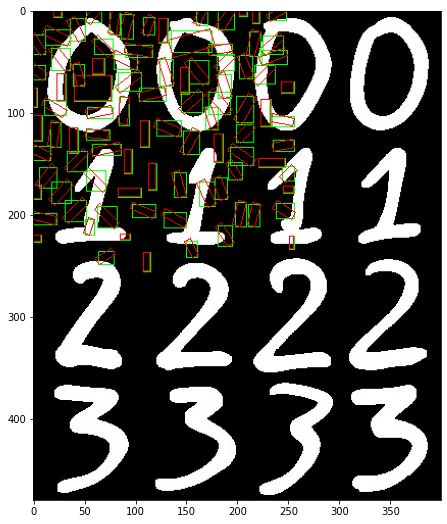

In [14]:
import math
out = im * 1
for idx, cnt in enumerate(contours):
    # Rectángulo (no rotado) en el que se inscribe el contorno
    # x,y representan la esquina superior izquierda 
    # w,h es el ancho y alto del rectángulo
    x,y,w,h = cv2.boundingRect(cnt) 
    cv2.rectangle(out, (x,y), (x+w,y+h), (0,255,0),1) # Lo dibujamos en verde
    
    # Rectángulo rotado en el que se inscribe el contorno
    # Esta función devuelve además el ángulo de rotación del rectángulo
    ((x,y),(w,h), angle) = cv2.minAreaRect(cnt) 
    # Es necesario calcular los cuatro esquinas del rectángulo a partir de 
    # las variables que devuelve la función minAreaRect
    box = cv2.boxPoints(((x,y),(w,h), angle))
    box = np.int0(box) # Convertir flotantes a enteros (las posiciones en la imagen son enteros!)
    cv2.drawContours(out, [box], 0, (255,0,0),1)
    
    eccentricity = max(w,h) / min(w,h)
    rectangularity = cv2.contourArea(cnt) / (w*h)
    print("Contorno", idx)
    print("\tArea", cv2.contourArea(cnt)) # Area
    print("\tPerimetro", cv2.arcLength(cnt, True)) # Perímetro
    print("\tCircularidad", 4*math.pi * cv2.contourArea(cnt) / (cv2.arcLength(cnt, True) * cv2.arcLength(cnt, True)) ) 
    print("\tExcentricidad",eccentricity)
    print("\tRectangularidad",rectangularity)
plt.imshow(out, cmap='gray')
plt.show()

## Momentos

La función `moments` permite calcular los momentos de un contorno. Esta función recibe como parámetro un único contorno y como salida devuelve un diccionario con los momentos calculados.

In [9]:
M = cv2.moments(contours[0]) # Calculamos los momentos del primer contorno
print(M)

{'m00': 98.0, 'm10': 10888.0, 'm01': 24126.0, 'm20': 1209941.3333333333, 'm11': 2680289.1666666665, 'm02': 5941876.333333333, 'm30': 134485223.0, 'm21': 297832641.3333333, 'm12': 660076484.6666666, 'm03': 1463997855.0, 'mu20': 262.31292517017573, 'mu11': -158.67006802745163, 'mu02': 2449.0272108847275, 'mu30': -15.403998345136642, 'mu21': 96.34763298067992, 'mu12': 21.7155352824484, 'mu03': -909.0712203979492, 'nu20': 0.027312882670780473, 'nu11': -0.016521248232762558, 'nu02': 0.25500075082098367, 'nu30': -0.0001620198680197607, 'nu21': 0.001013388240493714, 'nu12': 0.00022840486486754014, 'nu03': -0.009561647297627778}


A partir del diccionario de momentos podemos calcular distintos valores:

In [10]:
print("Area", M['m00'])
print("Centro de masas: cx", M['m10']/M['m00'], "cy", M['m01']/M['m00'])
print("Varianza alrededor del centro de masas en x ", M['m20']/M['m00'] - (M['m10']/M['m00'])*(M['m10']/M['m00']))
print("Varianza alrededor del centro de masas en y ", M['m02']/M['m00'] - (M['m01']/M['m00'])*(M['m01']/M['m00']))


Area 98.0
Centro de masas: cx 111.10204081632654 cy 246.18367346938774
Varianza alrededor del centro de masas en x  2.6766625017335173
Varianza alrededor del centro de masas en y  24.99007358045492


La función `HuMoments` permite calcular los siete momentos de Hu del contorno. Esta función toma como entrada los momentos de un contorno y devuelve los siete momentos de Hu.

In [11]:
M = cv2.HuMoments(cv2.moments(contours[0]))
print(M)

[[2.82313633e-01]
 [5.29335719e-02]
 [1.59523472e-04]
 [7.30771399e-05]
 [7.88255965e-09]
 [1.66742730e-05]
 [3.45736768e-10]]


OpenCV implementa además la función `matchShapes` que compara dos formas utilizando internamente los momentos de Hu. Esta función toma como parámetros los arrays de dos contornos a comparar y el método a utilizar en la comparación. Cuanto más próximo a cero sea el valor de salida, más parecidos serán los contornos.

0.2177739550756495
0.06757064913246558


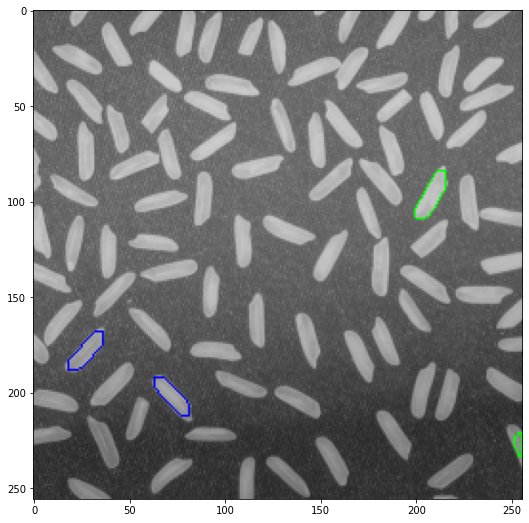

In [12]:
out = im * 1
print(cv2.matchShapes(contours[3], contours[50], cv2.CONTOURS_MATCH_I1, 0))
print(cv2.matchShapes(contours[10], contours[20], cv2.CONTOURS_MATCH_I1, 0))

cv2.drawContours(out, contours, 3, (0,255,0), 1)
cv2.drawContours(out, contours, 50, (0,255,0), 1)
cv2.drawContours(out, contours, 10, (0,0,255), 1)
cv2.drawContours(out, contours, 20, (0,0,255), 1)

plt.imshow(out, cmap='gray')
plt.show()



### Ejercicio

La imagen `digits3.jpg` contiene una serie de dígitos manuscritos. Utiliza la función `findContours` para encontrar los contornos de todos los dígitos y compara dichos contornos con `matchShapes`. Que rango de valores devuelve esta función para el mismo dígito? Y para dígitos diferentes? 

*Hint*: aplica una operación morfológica de apertura tras cargar la imagen para eliminar artefactos causados por la compresión.

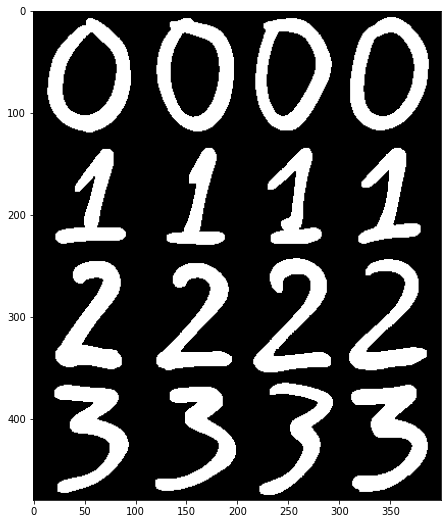

In [25]:
def getCoordinates(cnt):
    x,y,_,_ = cv2.boundingRect(cnt)
    return y

im = cv2.imread('res/digits.png')
ker = np.ones((3,3),np.uint8)


gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

im = cv2.morphologyEx(thr,cv2.MORPH_OPEN,ker)


contours, hierarchy = cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours,key=getCoordinates)
plt.imshow(im,cmap="gray")
plt.show()